# TED Talks Exploratory Data Analysis

## Import data and libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
from ast import literal_eval
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
#read in summarized ted talk data
ted_main_df = pd.read_csv('data/ted_main.csv')

#### What does the basic TED Talk dataset look like?

In [3]:
pd.set_option('display.max_columns', None)
ted_main_df.head()

comments                                        description  duration  \
0      4553  Sir Ken Robinson makes an entertaining and pro...      1164   
1       265  With the same humor and humanity he exuded in ...       977   
2       124  New York Times columnist David Pogue takes aim...      1286   
3       200  In an emotionally charged talk, MacArthur-winn...      1116   
4       593  You've never seen data presented like this. Wi...      1190   

     event   film_date  languages   main_speaker  \
0  TED2006  1140825600         60   Ken Robinson   
1  TED2006  1140825600         43        Al Gore   
2  TED2006  1140739200         26    David Pogue   
3  TED2006  1140912000         35  Majora Carter   
4  TED2006  1140566400         48   Hans Rosling   

                                            name  num_speaker  published_date  \
0      Ken Robinson: Do schools kill creativity?            1      1151367060   
1           Al Gore: Averting the climate crisis            1      1151367060   
2                  David Pogue: Simplicity sells            1      1151367060   
3             Majora Carter: Greening the ghetto            1      1151367060   
4  Hans Rosling: The best stats you've ever seen            1      1151440680   

                                             ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
1  [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...   
2  [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...   
3  [{'id': 3, 'name': 'Courageous', 'count': 760}...   
4  [{'id': 9, 'name': 'Ingenious', 'count': 3202}...   

                                       related_talks  \
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...   
1  [{'id': 243, 'hero': 'https://pe.tedcdn.com/im...   
2  [{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...   
3  [{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...   
4  [{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...   

                     speaker_occupation  \
0                       Author/educator   
1                      Climate advocate   
2                  Technology columnist   
3    Activist for environmental justice   
4  Global health expert; data visionary   

                                                tags  \
0  ['children', 'creativity', 'culture', 'dance',...   
1  ['alternative energy', 'cars', 'climate change...   
2  ['computers', 'entertainment', 'interface desi...   
3  ['MacArthur grant', 'activism', 'business', 'c...   
4  ['Africa', 'Asia', 'Google', 'demo', 'economic...   

                             title  \
0      Do schools kill creativity?   
1      Averting the climate crisis   
2                 Simplicity sells   
3              Greening the ghetto   
4  The best stats you've ever seen   

                                                 url     views  
0  https://www.ted.com/talks/ken_robinson_says_sc...  47227110  
1  https://www.ted.com/talks/al_gore_on_averting_...   3200520  
2  https://www.ted.com/talks/david_pogue_says_sim...   1636292  
3  https://www.ted.com/talks/majora_carter_s_tale...   1697550  
4  https://www.ted.com/talks/hans_rosling_shows_t...  12005869

The columns in my dataset are:
- **Comments**: number of comments posted by people watching the talk online
- **Description**: short description of the talk's content
- **Duration**: length of the talk in seconds
- **Event**: name of the TED event where the talk was given/recorded
- **Film_date**: UNIX timestamp of when the talk was given/recorded
- **Languages**: number of languages the talk has been translated into
- **Main_speaker**: name of the primary speaker for the talk
- **Name**: combination of the talk's main speaker and the title
- **Num_speaker**: total number of speakers involved in the talk
- **Published_date**: UNIX timestamp when the talk recording was published online
- **Ratings**: list of dictionaries containing ratings categories and the number of votes the talk received for each category
- **Related_talks**: list of dictionaries containing URLs of talks with similar content
- **Speaker_occupation**: what the speaker(s) do for a living
- **Tags**: short list of keywords describing the talk content
- **Title**: talk title
- **URL**: link where the talk is published
- **Views**: how many times the published talk has been viewed

In [4]:
ted_main_df.describe()

comments     duration     film_date    languages  num_speaker  \
count  2550.000000  2550.000000  2.550000e+03  2550.000000  2550.000000   
mean    191.562353   826.510196  1.321928e+09    27.326275     1.028235   
std     282.315223   374.009138  1.197391e+08     9.563452     0.207705   
min       2.000000   135.000000  7.464960e+07     0.000000     1.000000   
25%      63.000000   577.000000  1.257466e+09    23.000000     1.000000   
50%     118.000000   848.000000  1.333238e+09    28.000000     1.000000   
75%     221.750000  1046.750000  1.412964e+09    33.000000     1.000000   
max    6404.000000  5256.000000  1.503792e+09    72.000000     5.000000   

       published_date         views  
count    2.550000e+03  2.550000e+03  
mean     1.343525e+09  1.698297e+06  
std      9.464009e+07  2.498479e+06  
min      1.151367e+09  5.044300e+04  
25%      1.268463e+09  7.557928e+05  
50%      1.340935e+09  1.124524e+06  
75%      1.423432e+09  1.700760e+06  
max      1.506092e+09  4.722711e+07

### Notes:

**Comments**
- There is a lot of variation in the number of comments. 75% of talks have fewer than 222 comments, but the range is 2-6404 and the standard deviation is more than 280.
- The amount of time since a talk has been published may skew the number of comments posted towards older talks.

**Duration**
- The shortest talk is only 2 minutes long, but most are about 10-15 minutes. The longest "talk" is almost 1.5 hours long.

**Languages**
- The minimum is 0 languages. These bear closer scrutiny since a "talk" should be available in at least 1 language.

**Num_speaker**
- The vast majority of talks have only one speaker. This feature doesn't appear to have much variability.

**Views**
- There are three orders of magnitude between the min (50,443) and the max (47,227,110). 


In [5]:
ted_main_df[ted_main_df['languages'] == 0]

comments                                        description  duration  \
58         222  Two Pilobolus dancers perform "Symbiosis." Doe...       825   
115         27  The avant-garde string quartet Ethel performs ...       214   
135         36  After Vusi Mahlasela's 3-song set at TEDGlobal...       299   
209         67  Rokia Traore sings the moving "M'Bifo," accomp...       419   
237         43  Singer-songwriter Rokia Traore performs "Kouna...       386   
...        ...                                                ...       ...   
1427       229  Kid President commands you to wake up, listen ...       208   
1467       183  As we move through the world, we have an innat...       388   
1486       126  What color is a mirror? How much does a video ...       441   
2407         5  Grammy-winning Silk Road Ensemble display thei...       389   
2418        11  Sō Percussion creates adventurous compositions...       609   

               event   film_date  languages            main_speaker  \
58           TED2005  1109289600          0               Pilobolus   
115          TED2006  1138838400          0                   Ethel   
135   TEDGlobal 2007  1181260800          0          Vusi Mahlasela   
209   TEDGlobal 2007  1181088000          0            Rokia Traore   
237   TEDGlobal 2007  1181088000          0            Rokia Traore   
...              ...         ...        ...                     ...   
1427     SoulPancake  1358985600          0           Kid President   
1467   TEDYouth 2012  1353110400          0  Katherine Kuchenbecker   
1486          TED-Ed  1362009600          0         Michael Stevens   
2407         TED2016  1455494400          0      Silk Road Ensemble   
2418         TED2016  1455494400          0           Sō Percussion   

                                                 name  num_speaker  \
58                  Pilobolus: A dance of "Symbiosis"            1   
115         Ethel: A string quartet plays "Blue Room"            1   
135                            Vusi Mahlasela: "Woza"            1   
209                            Rokia Traore: "M'Bifo"            1   
237                          Rokia Traore: "Kounandi"            1   
...                                               ...          ...   
1427    Kid President: I think we all need a pep talk            1   
1467  Katherine Kuchenbecker: The technology of touch            1   
1486    Michael Stevens: How much does a video weigh?            1   
2407                  Silk Road Ensemble: "Turceasca"            1   
2418      Sō Percussion: "Music for Wood and Strings"            1   

      published_date                                            ratings  \
58        1170979860  [{'id': 1, 'name': 'Beautiful', 'count': 1810}...   
115       1182184140  [{'id': 1, 'name': 'Beautiful', 'count': 216},...   
135       1187695440  [{'id': 8, 'name': 'Informative', 'count': 4},...   
209       1206580680  [{'id': 23, 'name': 'Jaw-dropping', 'count': 5...   
237       1212627600  [{'id': 22, 'name': 'Fascinating', 'count': 84...   
...              ...                                                ...   
1427      1359734822  [{'id': 10, 'name': 'Inspiring', 'count': 771}...   
1467      1364569190  [{'id': 9, 'name': 'Ingenious', 'count': 150},...   
1486      1366815569  [{'id': 22, 'name': 'Fascinating', 'count': 17...   
2407      1489759215  [{'id': 1, 'name': 'Beautiful', 'count': 80}, ...   
2418      1490963646  [{'id': 21, 'name': 'Unconvincing', 'count': 8...   

                                          related_talks   speaker_occupation  \
58    [{'id': 40, 'hero': 'https://pe.tedcdn.com/ima...        Dance company   
115   [{'id': 103, 'hero': 'https://pe.tedcdn.com/im...       String quartet   
135   [{'id': 158, 'hero': 'https://pe.tedcdn.com/im...   Musician, activist   
209   [{'id': 265, 'hero': 'https://pe.tedcdn.com/im...    Singer-songwriter   
237   [{'id': 186, 'hero': 'https://pe.tedcdn.com/im...    Sin

There are 86 records with 0 languages.
It looks like many of these are music or dance performances, which would explain how they have 0 spoken languages.
But some are still suspect, like "Kid President: I think we all need a pep talk". 

If languages is a feature we want to use in a model, these may need additional cleaning.

#### Are any other columns missing values?

In [6]:
ted_main_df.isnull().any()

comments              False
description           False
duration              False
event                 False
film_date             False
languages             False
main_speaker          False
name                  False
num_speaker           False
published_date        False
ratings               False
related_talks         False
speaker_occupation     True
tags                  False
title                 False
url                   False
views                 False
dtype: bool

In [7]:
ted_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

Yes, there appear to be 6 missing values in the speaker_occupation column. We'll look at these a little later.

## Clean and transform columns

#### Turn UNIX dates into datetime values.

I'm also keeping the original numeric dates for exploring correlations later.

In [8]:
ted_main_df['film_datestamp'] = ted_main_df['film_date'].apply(datetime.fromtimestamp)
ted_main_df['published_datestamp'] = ted_main_df['published_date'].apply(datetime.fromtimestamp)
ted_main_df[['film_datestamp','published_datestamp']]

film_datestamp published_datestamp
0    2006-02-24 18:00:00 2006-06-26 19:11:00
1    2006-02-24 18:00:00 2006-06-26 19:11:00
2    2006-02-23 18:00:00 2006-06-26 19:11:00
3    2006-02-25 18:00:00 2006-06-26 19:11:00
4    2006-02-21 18:00:00 2006-06-27 15:38:00
...                  ...                 ...
2545 2017-06-05 19:00:00 2017-09-19 15:00:16
2546 2017-04-23 19:00:00 2017-09-20 10:02:17
2547 2017-04-23 19:00:00 2017-09-21 10:01:35
2548 2017-07-07 19:00:00 2017-09-21 15:00:42
2549 2017-04-23 19:00:00 2017-09-22 10:00:22

[2550 rows x 2 columns]

#### Fill missing values

Let's look again at the missing speaker occupations.

In [9]:
ted_main_df[ted_main_df['speaker_occupation'].isnull()]

comments                                        description  duration  \
1113       145  After a crisis, how can we tell if water is sa...       217   
1192       122  The Pirate Party fights for transparency, anon...      1097   
1220       257  As you surf the Web, information is being coll...       399   
1656       140  In this lovely talk, TED Fellow Ryan Holladay ...       389   
1911        48  What do you do with an outdated encyclopedia i...       366   
1949        70  Photographer Boniface Mwangi wanted to protest...       440   

                      event   film_date  languages     main_speaker  \
1113         TEDGlobal 2011  1310601600         38    Sonaar Luthra   
1192           TEDxObserver  1331424000         10   Rick Falkvinge   
1220                TED2012  1330473600         32      Gary Kovacs   
1656  TED@BCG San Francisco  1383091200         33    Ryan Holladay   
1911          TEDYouth 2014  1415059200         34    Brian Dettmer   
1949         TEDGlobal 2014  1413763200         33  Boniface Mwangi   

                                                   name  num_speaker  \
1113               Sonaar Luthra: Meet the Water Canary            1   
1192                      Rick Falkvinge: I am a pirate            1   
1220          Gary Kovacs: Tracking our online trackers            1   
1656  Ryan Holladay: To hear this music you have to ...            1   
1911             Brian Dettmer: Old books reborn as art            1   
1949          Boniface Mwangi: The day I stood up alone            1   

      published_date                                            ratings  \
1113      1326731605  [{'id': 10, 'name': 'Inspiring', 'count': 73},...   
1192      1333289675  [{'id': 8, 'name': 'Informative', 'count': 156...   
1220      1336057219  [{'id': 23, 'name': 'Jaw-dropping', 'count': 9...   
1656      1389369735  [{'id': 1, 'name': 'Beautiful', 'count': 211},...   
1911      1423238442  [{'id': 1, 'name': 'Beautiful', 'count': 361},...   
1949      1427989423  [{'id': 3, 'name': 'Courageous', 'count': 614}...   

                                          related_talks speaker_occupation  \
1113  [{'id': 523, 'hero': 'https://pe.tedcdn.com/im...                NaN   
1192  [{'id': 1329, 'hero': 'https://pe.tedcdn.com/i...                NaN   
1220  [{'id': 1370, 'hero': 'https://pe.tedcdn.com/i...                NaN   
1656  [{'id': 1152, 'hero': 'https://pe.tedcdn.com/i...                NaN   
1911  [{'id': 610, 'hero': 'https://pe.tedcdn.com/im...                NaN   
1949  [{'id': 1757, 'hero': 'https://pe.tedcdn.com/i...                NaN   

                                                   tags  \
1113  ['TED Fellows', 'design', 'global development'...   
1192  ['Internet', 'TEDx', 'global issues', 'politic...   
1220  ['Internet', 'advertising', 'business', 'priva...   
1656  ['TED Fellows', 'entertainment', 'music', 'tec...   
1911         ['TEDYouth', 'art', 'books', 'creativity']   
1949  ['TED Fellows', 'activism', 'art', 'corruption...   

                                                  title  \
1113                              Meet the Water Canary   
1192                                      I am a pirate   
1220                       Tracking our online trackers   
1656  To hear this music you have to be there. Liter...   
1911                            Old books reborn as art   
1949                           The day I stood up alone   

                                                    url    views  \
1113  https://www.ted.com/talks/sonaar_luthra_meet_t...   353749   
1192  https://www.ted.com/talks/rick_falkvinge_i_am_...   181010   
1220  https://www.ted.com/talks/gary_kovacs_tracking...  2098639   
1656  https://www.ted.com/talks/ryan_holladay_to_hea...  1284510   
1911  https://www.ted.com/talks/brian_dettmer_old_bo...  1159937   
1949  https://www.ted.com/talks/boniface_mwangi_boni...  1342431   

          film_datestamp published_datestamp  
1113 2011-07-13 19:00:00

It's possible I could Google these speakers and find out their occupations, but for now I will just fill with "Unknown".

In [10]:
ted_main_df['speaker_occupation'].fillna('Unknown', inplace = True)

#### Process embedded data types

Some of the fields in the dataset had other data types embedded in them, like lists and dictionaries, but they were read in as strings. Here we will convert them to their Python data types.

In [11]:
ted_main_df['tags'] = ted_main_df['tags'].apply(literal_eval)
ted_main_df['tags'][0] #show sample

['children',
 'creativity',
 'culture',
 'dance',
 'education',
 'parenting',
 'teaching']

In [12]:
ted_main_df['ratings'] = ted_main_df['ratings'].apply(literal_eval)
rating_df = pd.DataFrame(ted_main_df['ratings'][0]) #show sample
rating_df.head()

id        name  count
0   7       Funny  19645
1   1   Beautiful   4573
2   9   Ingenious   6073
3   3  Courageous   3253
4  11  Longwinded    387

## Explore correlations between features

In [13]:
ted_main_df.corr()

comments  duration  film_date  languages  num_speaker  \
comments        1.000000  0.140694  -0.133303   0.318284    -0.035489   
duration        0.140694  1.000000  -0.242941  -0.295681     0.022257   
film_date      -0.133303 -0.242941   1.000000  -0.061957     0.040227   
languages       0.318284 -0.295681  -0.061957   1.000000    -0.063100   
num_speaker    -0.035489  0.022257   0.040227  -0.063100     1.000000   
published_date -0.185936 -0.166324   0.902565  -0.171836     0.049240   
views           0.530939  0.048740   0.006447   0.377623    -0.026389   

                published_date     views  
comments             -0.185936  0.530939  
duration             -0.166324  0.048740  
film_date             0.902565  0.006447  
languages            -0.171836  0.377623  
num_speaker           0.049240 -0.026389  
published_date        1.000000 -0.017920  
views                -0.017920  1.000000

<AxesSubplot:>

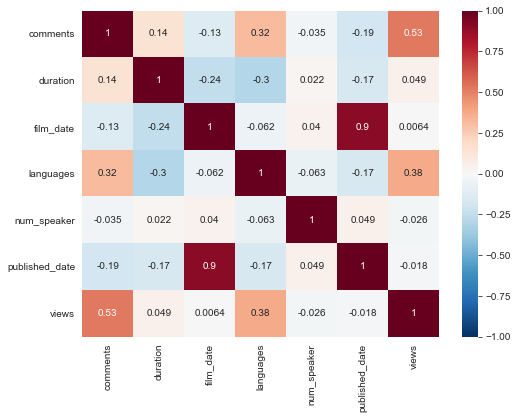

In [14]:
plt.figure(figsize = (8,6))
sns.heatmap(data = ted_main_df.corr(), annot = True, cmap = 'RdBu_r', vmin = -1, vmax = 1)

Correlation notes:

- **Comments**
    - Minor positive correlation with **duration** (the longer a talk, the more likely it is to be commented on)
    - Minor negative correlation with **film date** (older talks have more comments, possibly because they've been available for commenting longer?)
    - Medium correlation with **languages** (talks with more comments are available in more languages)
    - Slight negative correlation with **published date** (see comments on correlation with film date)
    - Reasonably strong correlation with **views** (talks with more comments have been viewed more times)  
   
   
- **Duration**
    - Slight negative correlation with **film date** (talks have gotten shorter over time)
    - Slight negative correlation with **languages** (longer talks are available in fewer languages)
    - Minor negative correlation with **published date** (talks published more recently are a little shorter)  
   
   
- **Film Date**
    - Strong positive correlation with **published date** (talks are published around the same time they are filmed)   
   
   
- **Languages**
    - Minor negative correlation with **published date** (talks published more recently are available in fewer languages, possibly because there's been less time to translate them)
    - Medium correlation with **views** (talks available in more languages have more views)   
   
   
- **Num Speaker** - no meaningful correlations

## View feature distributions

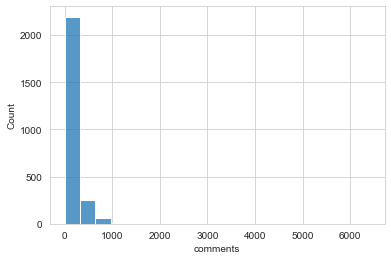

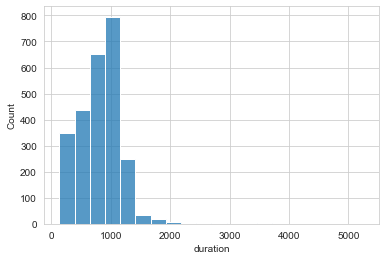

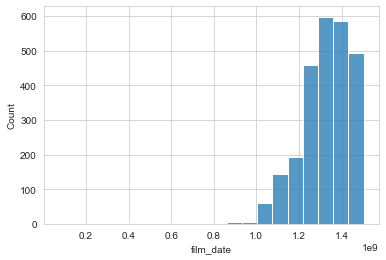

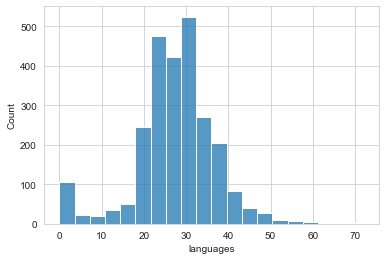

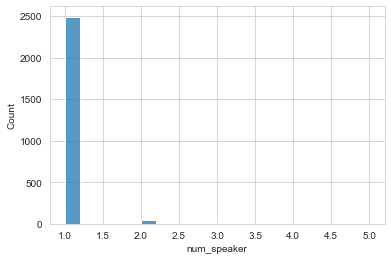

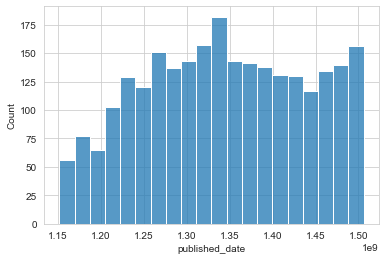

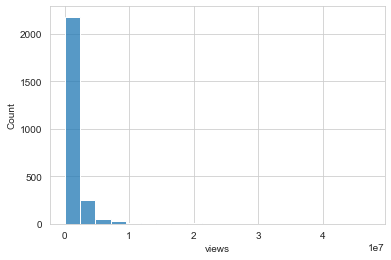

In [15]:
def plot_hist(features, df):
    
    for feature in features:
        sns.histplot(data = df[feature], bins = 20)
        plt.show()

feature_list = ['comments','duration','film_date','languages','num_speaker','published_date','views']

plot_hist(feature_list, ted_main_df)

Many of the distributions appear skewed. 

Languages seems roughly normal except for the bump at 0.

Published date looks more uniform than others.

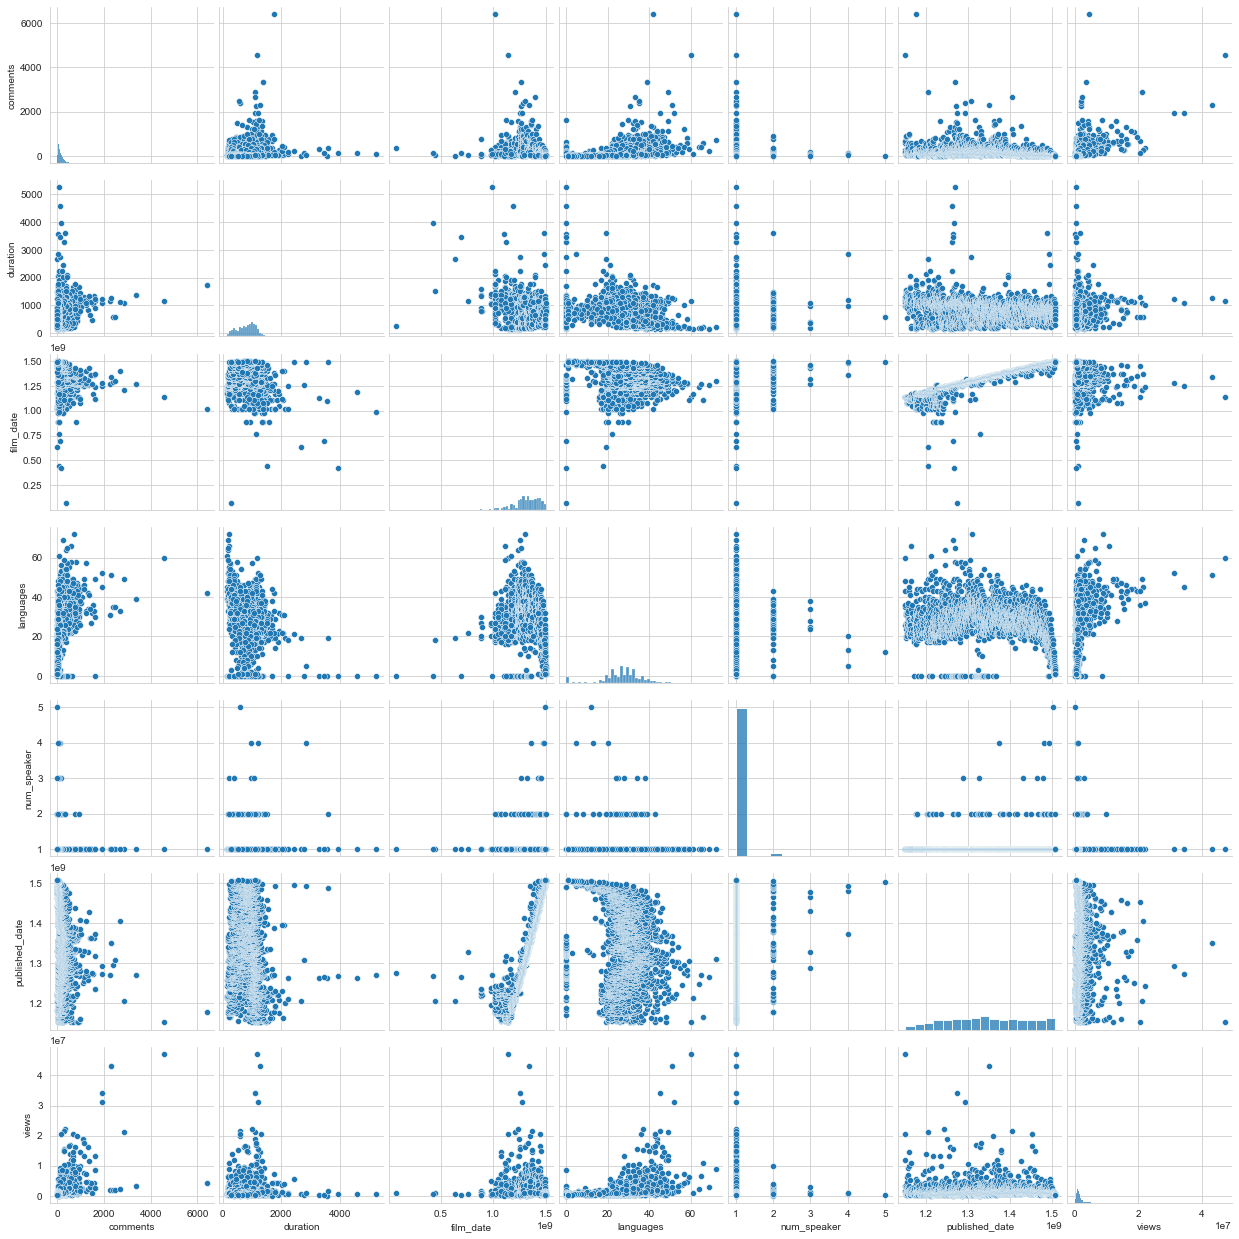

In [16]:
sns.pairplot(ted_main_df)

## Explore data

#### TED Talks by Year

<AxesSubplot:>

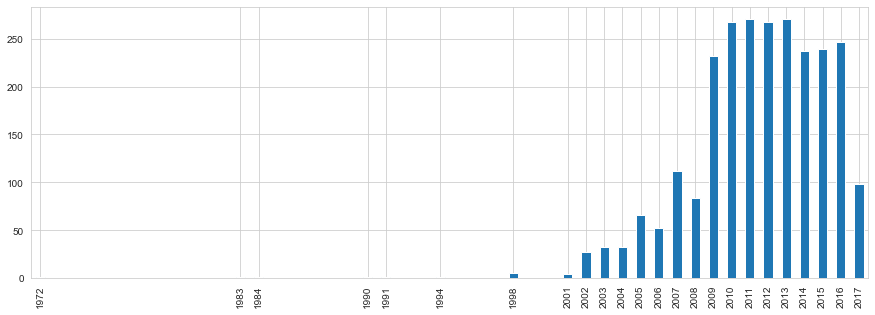

In [17]:
ted_main_df['film_datestamp'].dt.year.value_counts().sort_index()
ted_main_df['film_datestamp'].dt.year.value_counts().plot(kind = 'bar', figsize = (15,5))

Although the earliest talks in the dataset date back to 1972, they weren't recorded on a regular basis until around 2002.
There's a big jump in 2009, more than doubling the typical number of talks per year.
It looks like 2017 may not include the complete year.

In [18]:
ted_main_df['film_datestamp'].max()

Timestamp('2017-08-26 19:00:00')

The 2017 data only goes through late August.

In [19]:
ted_main_df['event'].nunique()

355

There are 355 unique TED events in the dataset.

<AxesSubplot:>

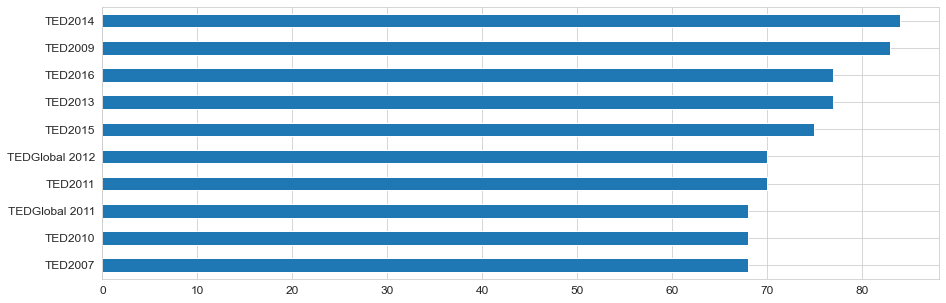

In [20]:
ted_main_df['event'].value_counts()[:10].sort_values(ascending = True).plot(kind = 'barh', figsize = (15,5), fontsize = 12)

TED2014 and TED2009 have more published talks than any of the other events, with more than 80 each.

Most talks have only one speaker. What are some of the talks with more than one speaker?

In [21]:
ted_main_df[ted_main_df['num_speaker'] > 1][['num_speaker','description','name','title','speaker_occupation','tags']][:15]

num_speaker                                        description  \
93             2  Singer/songwriter Eddi Reader performs "Kitefl...   
94             2  Singer/songwriter Eddi Reader performs "What Y...   
98             2  Featuring the vocals and mischievous bell-play...   
100            2  Violinist Natalie MacMaster and TED Musical Di...   
101            2  Google co-founders Larry Page and Sergey Brin ...   
193            2  Two TED favorites, Jill Sobule and Julia Sween...   
197            2  Educator Roy Gould and researcher Curtis Wong ...   
216            2  Tod Machover of MIT's Media Lab is devoted to ...   
249            2  Composer Sxip Shirey makes music from the simp...   
272            2  After Robert Lang's talk on origami at TED2008...   
321            2  The Inventables guys, Zach Kaplan and Keith Sc...   
401            2  This demo -- from Pattie Maes' lab at MIT, spe...   
612            2  TED visits Tom Shannon in his Manhattan studio...   
680            2  To write his first studio album in decades, "A...   
706            2  Nuclear power: the energy crisis has even die-...   

                                                  name  \
93                     Eddi Reader: "Kiteflyer's Hill"   
94                      Eddi Reader: "What You've Got"   
98                  Rachelle Garniez: "La Vie en Rose"   
100  Natalie MacMaster: Cape Breton fiddling in ree...   
101    Sergey Brin + Larry Page: The genesis of Google   
193  Jill Sobule + Julia Sweeney: The Jill and Juli...   
197  Roy Gould + Curtis Wong: A preview of the Worl...   
216  Tod Machover + Dan Ellsey: Inventing instrumen...   
249  Sxip Shirey + Rachelle Garniez: A performance ...   
272  Bruno Bowden + Rufus Cappadocia: Blindfold ori...   
321  Zach Kaplan + Keith Schacht: Toys and material...   
401  Pattie Maes + Pranav Mistry: Meet the SixthSen...   
612  Tom Shannon, John Hockenberry: The painter and...   
680            Thomas Dolby: "Love Is a Loaded Pistol"   
706  Stewart Brand + Mark Z. Jacobson: Debate: Does...   

                                           title  \
93                            "Kiteflyer's Hill"   
94                             "What You've Got"   
98                              "La Vie en Rose"   
100            Cape Breton fiddling in reel time   
101                        The genesis of Google   
193                      The Jill and Julia Show   
197         A preview of the WorldWide Telescope   
216  Inventing instruments that unlock new music   
249    A performance with breath, music, passion   
272                  Blindfold origami and cello   
321           Toys and materials from the future   
401              Meet the SixthSense interaction   
612                 The painter and the pendulum   
680                    "Love Is a Loaded Pistol"   
706  Debate: Does the world need nuclear energy?   

                                    speaker_occupation  \
93                                   Singer/songwriter   
94                                   Singer/songwriter   
98                                            Musician   
100                                            Fiddler   
101  Computer scientist, entrepreneur and philanthr...   
193                                  Singer/songwriter   
197                                         Researcher   
216                                 Composer, inventor   
249                                           Musician   
272                             Engineer and origamist   
321                                           Inventor   
401                                         Researcher   
612                                           Sculptor   
680                           Electronic music pioneer   
706                         Environmentalist, futurist   

                                                  tags  
93   [composing, entertainment, guitar, memory, mus...  
94   [composing, entertainment, guitar, music, perf...  
98    

Many of these appear to be performances rather than talks.

#### Talks with the most engagement (views, comments)

In [22]:
pd.set_option('display.max_colwidth', None)

In [23]:
ted_main_df[['title','views','comments','description']].sort_values('views', ascending = False)[:10]

title     views  comments  \
0                           Do schools kill creativity?  47227110      4553   
1346           Your body language may shape who you are  43155405      2290   
677                    How great leaders inspire action  34309432      1930   
837                          The power of vulnerability  31168150      1927   
452              10 things you didn't know about orgasm  22270883       354   
1776         How to speak so that people want to listen  21594632       297   
201                                My stroke of insight  21190883      2877   
5                                  Why we do what we do  20685401       672   
2114  This is what happens when you reply to spam email  20475972       150   
1416  Looks aren't everything. Believe me, I'm a model.  19787465       846   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         description  
0                                                                                                                                                                                                                                                                                                                                                                                                              Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.  
1346  Body language affects how others see us, but it may also change how we see ourselves. Social psychologist Amy Cuddy argues that "power posing" — standing in a posture of confidence, even when we don't feel confident — can boost feelings of confidence, and might have an impact on our chances for success. NOTE: Some of the findings presented in this talk have been referenced in an ongoing debate among social scientists about robustness and reproducibility. Read "Criticisms & updates" below for more details as well as Amy Cuddy's response.  
677                                                                                                                                                                                                                                                                                                                                                   Simon Sinek has a simple but powerful model for inspirational leadership -- starting with a golden circle and the question "Why?"  His examples include Apple, Martin Luther King, and the Wright brothers ...  
837                                                                                                                                                                                                                                                                                                Brené Brown studies human connection -- our ability to empathize, belong, love. In a poignant, funny talk, she shares a deep insight from her research, one that sent her on a personal quest to know herself as well as to understand humanity. A talk to share.  
452                                                                                                                                                                                                                                                                                                              "Bonk" author Mary Roach delves into obscure scientific research, some of it centuries old, to make 10 surprising claims

In [24]:
ted_main_df[['title','views','comments','description']].sort_values('comments', ascending = False)[:10]

title     views  comments  \
96                            Militant atheism   4374792      6404   
0                  Do schools kill creativity?  47227110      4553   
644         Science can answer moral questions   3433437      3356   
201                       My stroke of insight  21190883      2877   
1787         How do you explain consciousness?   2162764      2673   
954               Taking imagination seriously   1832930      2492   
840                       On reading the Koran   1847256      2374   
1346  Your body language may shape who you are  43155405      2290   
661               The danger of science denial   1838628      2272   
677           How great leaders inspire action  34309432      1930   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         description  
96                                                                                                                                                                                                                                                                                                                                                                                           Richard Dawkins urges all atheists to openly state their position -- and to fight the incursion of the church into politics and science. A fiery, funny, powerful talk.  
0                                                                                                                                                                                                                                                                                                                                                                                                              Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.  
644                                                                                                                                                                                                                                                                                                            Questions of good and evil, right and wrong are commonly thought unanswerable by science. But Sam Harris argues that science can -- and should -- be an authority on moral issues, shaping human values and setting out what constitutes a good life.  
201                                                                                                                                                                                                                                                                                                                                  Jill Bolte Taylor got a research opportunity few brain scientists would wish for: She had a massive stroke, and watched as her brain functions -- motion, speech, self-awareness -- shut down one by one. An astonishing story.  
1787                                                                                                                                                                                                                                                                       Our consciousness is a fundamental aspect of our existence, says philosopher David Chalmers: “There’s nothing we know about more directly…. but at the same time it’s the most mysterious phenomenon in the universe.” He shares some ways to think abou

While there is some overlap between the most viewed and most commented talks, there are also notable differences.

Let's add another metric to compare comments per 10,000 views.

In [25]:
ted_main_df['comments_per_10k_views'] = ted_main_df['comments'] * 10000 / ted_main_df['views']

In [26]:
ted_main_df[['title','views','comments','comments_per_10k_views','description']].sort_values('views', ascending = False)[:10]

title     views  comments  \
0                           Do schools kill creativity?  47227110      4553   
1346           Your body language may shape who you are  43155405      2290   
677                    How great leaders inspire action  34309432      1930   
837                          The power of vulnerability  31168150      1927   
452              10 things you didn't know about orgasm  22270883       354   
1776         How to speak so that people want to listen  21594632       297   
201                                My stroke of insight  21190883      2877   
5                                  Why we do what we do  20685401       672   
2114  This is what happens when you reply to spam email  20475972       150   
1416  Looks aren't everything. Believe me, I'm a model.  19787465       846   

      comments_per_10k_views  \
0                   0.964065   
1346                0.530640   
677                 0.562528   
837                 0.618259   
452                 0.158952   
1776                0.137534   
201                 1.357659   
5                   0.324867   
2114                0.073257   
1416                0.427543   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         description  
0                                                                                                                                                                                                                                                                                                                                                                                                              Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.  
1346  Body language affects how others see us, but it may also change how we see ourselves. Social psychologist Amy Cuddy argues that "power posing" — standing in a posture of confidence, even when we don't feel confident — can boost feelings of confidence, and might have an impact on our chances for success. NOTE: Some of the findings presented in this talk have been referenced in an ongoing debate among social scientists about robustness and reproducibility. Read "Criticisms & updates" below for more details as well as Amy Cuddy's response.  
677                                                                                                                                                                                                                                                                                                                                                   Simon Sinek has a simple but powerful model for inspirational leadership -- starting with a golden circle and the question "Why?"  His examples include Apple, Martin Luther King, and the Wright brothers ...  
837                                                                                                                                                                                                                                                                                                Brené Brown studies human connection -- our ability to empathize, belong, love. In a poignant, funny talk, she shares a deep insight from her research, one that sent her on a personal quest to know herself as well as to understand humanity. A talk to share.  
452                                                                     

The highest comments to views ratio for any of these talks is about 1.3 comments per 10,000 views.

In [27]:
ted_main_df[['title','views','comments','comments_per_10k_views','description']].sort_values('comments', ascending = False)[:10]

title     views  comments  \
96                            Militant atheism   4374792      6404   
0                  Do schools kill creativity?  47227110      4553   
644         Science can answer moral questions   3433437      3356   
201                       My stroke of insight  21190883      2877   
1787         How do you explain consciousness?   2162764      2673   
954               Taking imagination seriously   1832930      2492   
840                       On reading the Koran   1847256      2374   
1346  Your body language may shape who you are  43155405      2290   
661               The danger of science denial   1838628      2272   
677           How great leaders inspire action  34309432      1930   

      comments_per_10k_views  \
96                 14.638410   
0                   0.964065   
644                 9.774462   
201                 1.357659   
1787               12.359185   
954                13.595718   
840                12.851494   
1346                0.530640   
661                12.357040   
677                 0.562528   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         description  
96                                                                                                                                                                                                                                                                                                                                                                                           Richard Dawkins urges all atheists to openly state their position -- and to fight the incursion of the church into politics and science. A fiery, funny, powerful talk.  
0                                                                                                                                                                                                                                                                                                                                                                                                              Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.  
644                                                                                                                                                                                                                                                                                                            Questions of good and evil, right and wrong are commonly thought unanswerable by science. But Sam Harris argues that science can -- and should -- be an authority on moral issues, shaping human values and setting out what constitutes a good life.  
201                                                                                                                                                                                                                                                                                                                                  Jill Bolte Taylor got a research opportunity few brain scientists would wish for: She had a massive stroke, and watched as her brain functions -- motion, speech, self-awareness -- shut down one by one. An astonishing story.  
1787                                                                                                                                                              

Several of these talks achieve comments-to-views ratios of more than 10 comments per 10,000 views. It looks like these have particularly controversial themes like science vs. religion, morality, spirituality, or climate change.

In [28]:
pd.set_option('display.max_colwidth', 50)

## Tag analysis

#### Explode out the tags list so there is one row per tag per talk

In [29]:
#Create a series with one row per tag
s = ted_main_df.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'tags'
s

0             children
0           creativity
0              culture
0                dance
0            education
             ...      
2549              play
2549     public spaces
2549           society
2549          software
2549    urban planning
Name: tags, Length: 19154, dtype: object

In [30]:
#Join the new series back to the original data
tags_df = ted_main_df.drop('tags', axis = 1).join(s)

#For ease of analysis, add a year column
tags_df['film_year'] = tags_df['film_datestamp'].dt.year

tags_df[['description','duration','event','film_datestamp','name','tags']].head(10)

description  duration    event  \
0  Sir Ken Robinson makes an entertaining and pro...      1164  TED2006   
0  Sir Ken Robinson makes an entertaining and pro...      1164  TED2006   
0  Sir Ken Robinson makes an entertaining and pro...      1164  TED2006   
0  Sir Ken Robinson makes an entertaining and pro...      1164  TED2006   
0  Sir Ken Robinson makes an entertaining and pro...      1164  TED2006   
0  Sir Ken Robinson makes an entertaining and pro...      1164  TED2006   
0  Sir Ken Robinson makes an entertaining and pro...      1164  TED2006   
1  With the same humor and humanity he exuded in ...       977  TED2006   
1  With the same humor and humanity he exuded in ...       977  TED2006   
1  With the same humor and humanity he exuded in ...       977  TED2006   

       film_datestamp                                       name  \
0 2006-02-24 18:00:00  Ken Robinson: Do schools kill creativity?   
0 2006-02-24 18:00:00  Ken Robinson: Do schools kill creativity?   
0 2006-02-24 18:00:00  Ken Robinson: Do schools kill creativity?   
0 2006-02-24 18:00:00  Ken Robinson: Do schools kill creativity?   
0 2006-02-24 18:00:00  Ken Robinson: Do schools kill creativity?   
0 2006-02-24 18:00:00  Ken Robinson: Do schools kill creativity?   
0 2006-02-24 18:00:00  Ken Robinson: Do schools kill creativity?   
1 2006-02-24 18:00:00       Al Gore: Averting the climate crisis   
1 2006-02-24 18:00:00       Al Gore: Averting the climate crisis   
1 2006-02-24 18:00:00       Al Gore: Averting the climate crisis   

                 tags  
0            children  
0          creativity  
0             culture  
0               dance  
0           education  
0           parenting  
0            teaching  
1  alternative energy  
1                cars  
1      climate change

#### Identify the 10 most commonly occurring tags

In [31]:
# Top 10 talk tags (topics), not counting TEDx, which I will remove next
tags_df['tags'].value_counts()[0:11]

technology       727
science          567
global issues    501
culture          486
TEDx             450
design           418
business         348
entertainment    299
health           236
innovation       229
society          224
Name: tags, dtype: int64

In [32]:
#store the top 10 topics (ignoring TEDx) in a list for charting
tag_list = list(tags_df['tags'].value_counts()[0:11].index)
tag_list.remove('TEDx')

<AxesSubplot:>

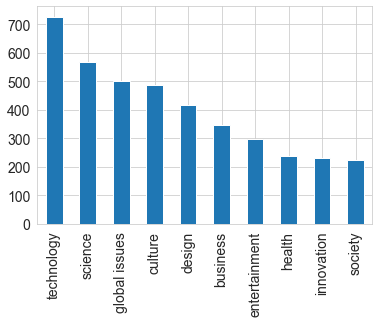

In [33]:
tags_df[tags_df['tags'].isin(tag_list)]['tags'].value_counts().plot(kind = 'bar', fontsize = 14)

In [34]:
#Sample of talks with top tags
tags_df[tags_df['tags'].isin(tag_list)]

comments                                        description  duration  \
0         4553  Sir Ken Robinson makes an entertaining and pro...      1164   
1          265  With the same humor and humanity he exuded in ...       977   
1          265  With the same humor and humanity he exuded in ...       977   
1          265  With the same humor and humanity he exuded in ...       977   
1          265  With the same humor and humanity he exuded in ...       977   
...        ...                                                ...       ...   
2546         6  How can you study Mars without a spaceship? He...       290   
2547        10  Science fiction visions of the future show us ...       651   
2547        10  Science fiction visions of the future show us ...       651   
2549         8  With more than half of the world population li...       519   
2549         8  With more than half of the world population li...       519   

        event   film_date  languages         main_speaker  \
0     TED2006  1140825600         60         Ken Robinson   
1     TED2006  1140825600         43              Al Gore   
1     TED2006  1140825600         43              Al Gore   
1     TED2006  1140825600         43              Al Gore   
1     TED2006  1140825600         43              Al Gore   
...       ...         ...        ...                  ...   
2546  TED2017  1492992000          3  Armando Azua-Bustos   
2547  TED2017  1492992000          1       Radhika Nagpal   
2547  TED2017  1492992000          1       Radhika Nagpal   
2549  TED2017  1492992000          1    Karoliina Korppoo   
2549  TED2017  1492992000          1    Karoliina Korppoo   

                                                   name  num_speaker  \
0             Ken Robinson: Do schools kill creativity?            1   
1                  Al Gore: Averting the climate crisis            1   
1                  Al Gore: Averting the climate crisis            1   
1                  Al Gore: Averting the climate crisis            1   
1                  Al Gore: Averting the climate crisis            1   
...                                                 ...          ...   
2546  Armando Azua-Bustos: The most Martian place on...            1   
2547  Radhika Nagpal: What intelligent machines can ...            1   
2547  Radhika Nagpal: What intelligent machines can ...            1   
2549  Karoliina Korppoo: How a video game might help...            1   
2549  Karoliina Korppoo: How a video game might help...            1   

      published_date                                            ratings  \
0         1151367060  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
1         1151367060  [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...   
1         1151367060  [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...   
1         1151367060  [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...   
1         1151367060  [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...   
...              ...                                                ...   
2546      1505919737  [{'id': 22, 'name': 'Fascinating', 'count': 32...   
2547      1506006095  [{'id': 1, 'name': 'Beautiful', 'count': 14}, ...   
2547      1506006095  [{'id': 1, 'name': 'Beautiful', 'count': 14}, ...   
2549      1506092422  [{'id': 21, 'name': 'Unconvincing', 'count': 2...   
2549      1506092422  [{'id': 21, 'name': 'Unconvincing', 'count': 2...   

                                          related_talks  speaker_occupation  \
0     [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...     Author/educator   
1     [{'id': 243, 'hero': 'https://pe.tedcdn.com/im...    Climate advocate   
1     [{'id': 243, 'hero': 'https://pe.tedcdn.com/im...    Climate advocate   
1     [{'id': 243, 'hero': 'https://pe.tedcdn.com/im...    Climate advocate   
1     [{'id': 243, 'hero': 'https://pe.tedcdn.com/im...    Climate advocate   
...                                                 ...                 ...   
2546 

#### Top tags count by year

In [35]:
top_tags = tags_df[tags_df['tags'].isin(tag_list)]
pd.crosstab(top_tags['film_year'], top_tags['tags'])

tags       business  culture  design  entertainment  global issues  health  \
film_year                                                                    
1983              0        0       0              0              0       0   
1984              0        0       1              1              0       0   
1990              0        0       1              0              1       0   
1991              0        0       0              0              0       0   
1994              0        0       0              0              0       0   
1998              0        2       4              1              0       0   
2001              0        2       1              1              0       0   
2002              5        9      10              6              4       0   
2003              5        8      10              7              7       2   
2004              7       15       8             11              3       1   
2005             24       34      16             13             14       2   
2006             10       28      15             14             17       7   
2007             20       29      30             36             42       8   
2008             14       20      23             29             20       3   
2009             42       39      47             27             54      24   
2010             53       67      45             38             68      21   
2011             25       78      56             36             55      15   
2012             31       54      33             25             56      27   
2013             34       51      33             22             40      25   
2014             21       17      15              7             31      24   
2015             15       17      25             10             34      33   
2016             35       14      32             11             39      32   
2017              7        2      13              4             16      12   

tags       innovation  science  society  technology  
film_year                                            
1983                0        1        0           0  
1984                0        0        0           1  
1990                0        0        0           1  
1991                0        1        0           0  
1994                1        1        0           1  
1998                0        1        0           5  
2001                0        1        1           1  
2002                1        9        0          11  
2003                1       11        2          13  
2004                0        6        1          10  
2005                2       21        2          29  
2006                1       11        0          16  
2007                0       21        0          51  
2008                2       28        2          27  
2009               16       56       12          77  
2010                7       68        7          66  
2011               11       77        4          88  
2012               29       64        9          75  
2013               16       35        1          64  
2014               11       29        4          41  
2015               39       55       36          51  
2016               75       56      103          73  
2017               17       15       40          26

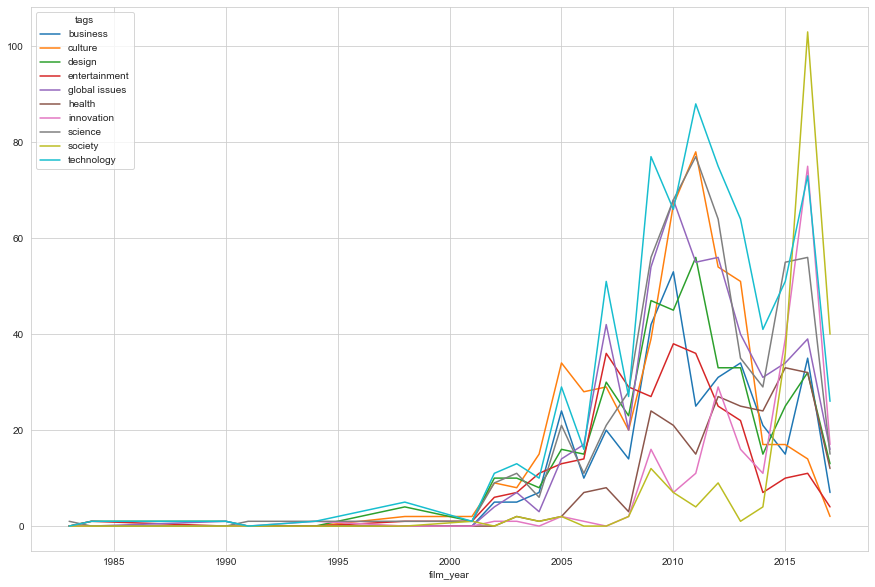

In [36]:
pd.crosstab(top_tags['film_year'], top_tags['tags']).plot(kind = 'line', stacked = False, figsize = (15,10))
plt.show()

TED Talks with the top tags really started to take off around 2001-2002, which is the same time talks started regularly being given.

#### Top tags by proportion of talks

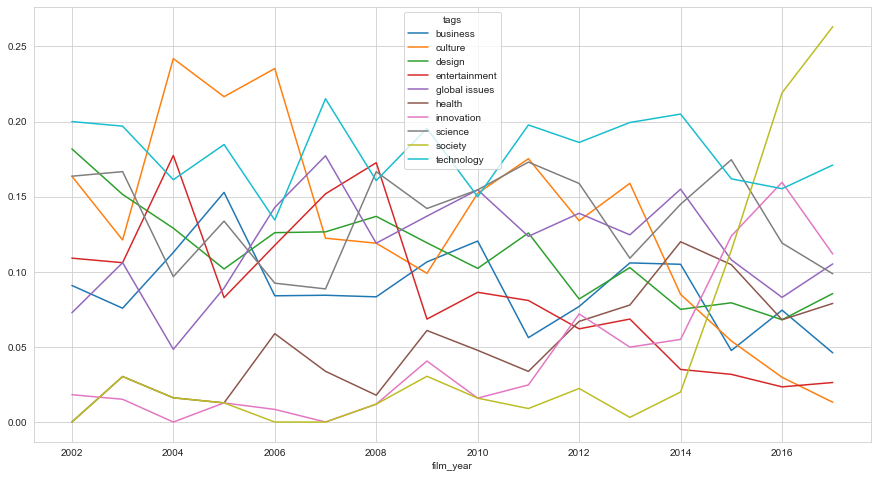

In [37]:
top_tags2001 = top_tags[top_tags['film_year'] > 2001]
top_tags_pct = pd.crosstab(top_tags2001['film_year'], top_tags2001['tags']).apply(lambda x: x/x.sum(), axis=1)
top_tags_pct.plot(kind = 'line', stacked = False, figsize = (15,8))
plt.show()

Early on, "culture" was a popular tag on a large proportion of TED talks, but this tag has been declining in popularity since at least 2013. Meanwhile, starting in 2014, there has been a big spike in the proportion of talks with the tag "society".

# Cluster TED Talks using KMeans

## Import Libraries for Modeling

In [38]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

## Vectorize tags

Several of the tags reference "TED" (e.g., TEDx, TED Prize, etc.). I want to remove these as they don't provide much meaning, but I don't want to remove more useful tags like 'United States'.

In [39]:
ted_main_df['tags_no_ted'] = [[s for s in element if not 'ted' in s.lower() or s.lower() in ['united states','augmented reality']] for element in ted_main_df['tags']]
ted_main_df['tags_no_ted'].unique

<bound method Series.unique of 0       [children, creativity, culture, dance, educati...
1       [alternative energy, cars, climate change, cul...
2       [computers, entertainment, interface design, m...
3       [MacArthur grant, activism, business, cities, ...
4       [Africa, Asia, Google, demo, economics, global...
                              ...                        
2545    [United States, community, family, immigration...
2546    [Mars, South America, astrobiology, biology, e...
2547    [AI, ants, fish, future, innovation, insects, ...
2548    [Internet, United States, community, compassio...
2549    [cities, design, future, infrastructure, play,...
Name: tags_no_ted, Length: 2550, dtype: object>

In [40]:
ted_main_df['tags_string'] = ted_main_df['tags_no_ted'].apply(' '.join)
ted_main_df['tags_string']

0       children creativity culture dance education pa...
1       alternative energy cars climate change culture...
2       computers entertainment interface design media...
3       MacArthur grant activism business cities envir...
4       Africa Asia Google demo economics global devel...
                              ...                        
2545    United States community family immigration jou...
2546    Mars South America astrobiology biology explor...
2547    AI ants fish future innovation insects intelli...
2548    Internet United States community compassion po...
2549    cities design future infrastructure play publi...
Name: tags_string, Length: 2550, dtype: object

Feed the cleaned tags into the TF/IDF vectorizer.

In [41]:
data = ted_main_df['tags_string']

tf_idf_vectorizor = TfidfVectorizer(
    stop_words = 'english', 
    max_features = 10000
)

tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

Sample the resulting array

In [42]:
tf_idf_df = pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names())
tf_idf_df.shape #(2550, 426)
tf_idf_df.head(10)

3d  activism  addiction  adventure  advertising    africa  aging  \
0  0.0  0.000000        0.0        0.0          0.0  0.000000    0.0   
1  0.0  0.000000        0.0        0.0          0.0  0.000000    0.0   
2  0.0  0.000000        0.0        0.0          0.0  0.000000    0.0   
3  0.0  0.259895        0.0        0.0          0.0  0.000000    0.0   
4  0.0  0.000000        0.0        0.0          0.0  0.257265    0.0   
5  0.0  0.000000        0.0        0.0          0.0  0.000000    0.0   
6  0.0  0.000000        0.0        0.0          0.0  0.000000    0.0   
7  0.0  0.000000        0.0        0.0          0.0  0.000000    0.0   
8  0.0  0.000000        0.0        0.0          0.0  0.000000    0.0   
9  0.0  0.000000        0.0        0.0          0.0  0.000000    0.0   

   agriculture   ai  aids  aircraft  algorithm  alternative  alzheimer  \
0          0.0  0.0   0.0       0.0        0.0     0.000000        0.0   
1          0.0  0.0   0.0       0.0        0.0     0.394482        0.0   
2          0.0  0.0   0.0       0.0        0.0     0.000000        0.0   
3          0.0  0.0   0.0       0.0        0.0     0.000000        0.0   
4          0.0  0.0   0.0       0.0        0.0     0.000000        0.0   
5          0.0  0.0   0.0       0.0        0.0     0.000000        0.0   
6          0.0  0.0   0.0       0.0        0.0     0.000000        0.0   
7          0.0  0.0   0.0       0.0        0.0     0.000000        0.0   
8          0.0  0.0   0.0       0.0        0.0     0.000000        0.0   
9          0.0  0.0   0.0       0.0        0.0     0.000000        0.0   

   america  ancient  animals  animation  anthropocene  anthropology  ants  \
0      0.0      0.0      0.0        0.0           0.0           0.0   0.0   
1      0.0      0.0      0.0        0.0           0.0           0.0   0.0   
2      0.0      0.0      0.0        0.0           0.0           0.0   0.0   
3      0.0      0.0      0.0        0.0           0.0           0.0   0.0   
4      0.0      0.0      0.0        0.0           0.0           0.0   0.0   
5      0.0      0.0      0.0        0.0           0.0           0.0   0.0   
6      0.0      0.0      0.0        0.0           0.0           0.0   0.0   
7      0.0      0.0      0.0        0.0           0.0           0.0   0.0   
8      0.0      0.0      0.0        0.0           0.0           0.0   0.0   
9      0.0      0.0      0.0        0.0           0.0           0.0   0.0   

   apes  archaeology  architecture  art     asia  asteroid  astrobiology  \
0   0.0          0.0      0.000000  0.0  0.00000       0.0           0.0   
1   0.0          0.0      0.000000  0.0  0.00000       0.0           0.0   
2   0.0          0.0      0.000000  0.0  0.00000       0.0           0.0   
3   0.0          0.0      0.000000  0.0  0.00000       0.0           0.0   
4   0.0          0.0      0.000000  0.0  0.34142       0.0           0.0   
5   0.0          0.0      0.000000  0.0  0.00000       0.0           0.0   
6   0.0          0.0      0.000000  0.0  0.00000       0.0           0.0   
7   0.0          0.0      0.487325  0.0  0.00000       0.0           0.0   
8   0.0          0.0      0.000000  0.0  0.00000       0.0           0.0   
9   0.0          0.0      0.000000  0.0  0.00000       0.0           0.0   

   astronomy   atheism  augmented  autism  bacteria  balance  bang  beauty  \
0        0.0  0.000000        0.0     0.0       0.0      0.0   0.0     0.0   
1        0.0  0.000000        0.0     0.0       0.0      0.0   0.0     0.0   
2        0.0  0.000000        0.0     0.0       0.0      0.0   0.0     0.0   
3        0.0  0.000000        0.0     0.0       0.0      0.0   0.0     0.0   
4        0.0  0.000000        0.0     0.0       0.0      0.0   0.0     0.0   
5        0.0  0.000000        0.0     0.0       0.0      0.0   0.0     0.0   
6        0.0  0.457422        0.0     0.0       0.0      0.0   0.0     0.0   
7        0.0  0.000000        0.0     0.0       0.0      0.0   0.0     0.0   
8        

## Create and fit KMeans model

In [43]:
kmeans = KMeans (
    init="random",
    n_clusters = 3,
    n_init = 50,
    max_iter = 300,
    random_state = 42
)

In [44]:
# Fit the model to the vectorized tags
kmeans.fit(tf_idf_array)

KMeans(init='random', n_clusters=3, n_init=50, random_state=42)

In [45]:
# Assign clusters
predictions = kmeans.predict(tf_idf_array)

## View clusters

In [46]:
#import wordcloud library to help visualize cluster contents
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Identify the top features in each cluster, by TF/IDF score

In [47]:
def get_top_n_features_by_cluster(tf_idf_array, prediction, n_feats):
    
    labels = np.unique(prediction)
    dfs = []
    
    for label in labels:
        
        ix_temp = np.where(prediction == label) # indices for each cluster
        x_means = np.mean(tf_idf_array[ix_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
        
    return dfs

dfs = get_top_n_features_by_cluster(tf_idf_array, predictions, 20)

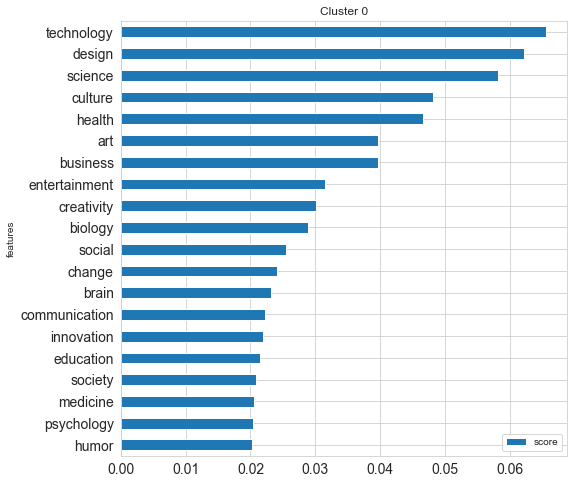

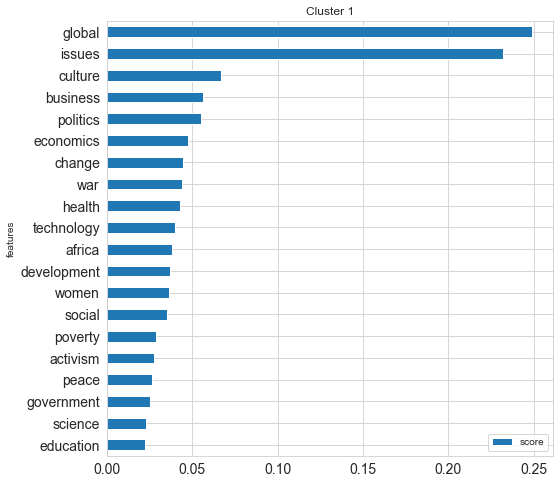

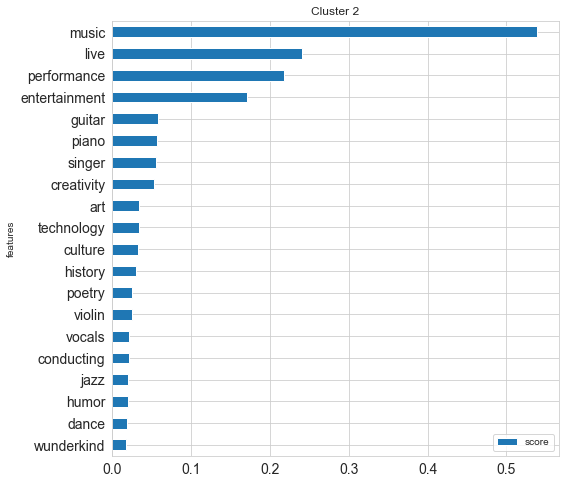

In [48]:
# Plot top features by score
for ix, df in enumerate(dfs):
    df.sort_values('score').plot(kind = 'barh', x = 'features', y = 'score', fontsize = 14, figsize = (8,8), title = ('Cluster ' + str(ix)))

Condense the information above into wordclouds

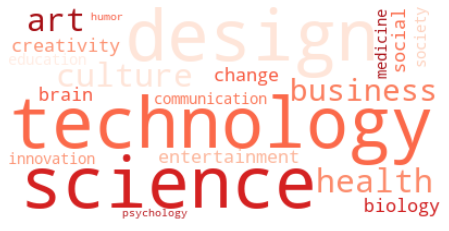

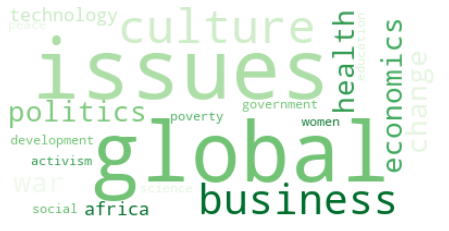

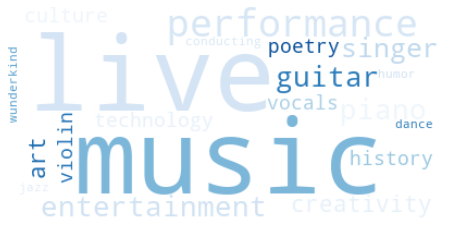

In [49]:
# Create stopword list:
stopwords = set(STOPWORDS)
cmaps = ['Reds','Greens','Blues']

for ix, df in enumerate(dfs):
    text = " ".join(desc for desc in df.features)

    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words = 200, colormap = cmaps[ix]).generate(text)

    # Display the generated image:
    # the matplotlib way:
    plt.figure(figsize = (8,4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

At a glance, it looks like the 3 clusters selected by the algorithm can be summarized as:
- Science and technology
- Global and cultural socioeconomic issues
- Arts and entertainment

Use silhouette score to evaluate the model

In [50]:
sil_score = silhouette_score(tf_idf_array, kmeans.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % sil_score)

Silhouette Score: 0.027


Silhouette scores range from -1 to 1. Scores near +/- 1 indicate well-separated clusters. Scores near zero, like this one, mean the clusters have a lot of overlap.

## Explore other hyperparameters

Increase number of clusters to 4

In [51]:
def plot_barh_top_features(dfs):
    for ix, df in enumerate(dfs):
        df.sort_values('score').plot(
            kind = 'barh', 
            x = 'features', 
            y = 'score', 
            fontsize = 14, 
            figsize = (10,len(df) / 2), 
            title = ('Cluster ' + str(ix))
        )

def plot_wordcloud(dfs,bg_color):
    cmaps = ['Reds','Greens','Blues','Oranges','Purples']

    for ix, df in enumerate(dfs):
        text = " ".join(desc for desc in df.features)

        # Generate a word cloud image
        wordcloud = WordCloud(
            stopwords=stopwords, 
            background_color = bg_color, 
            max_words = 200, 
            colormap = cmaps[ix % 5]
        ).generate(text)

        # Display the generated image:
        # the matplotlib way:
        plt.figure(figsize = (8,4))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()

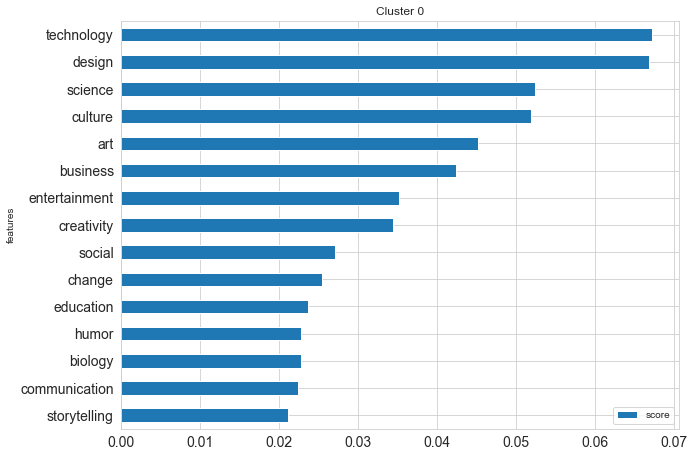

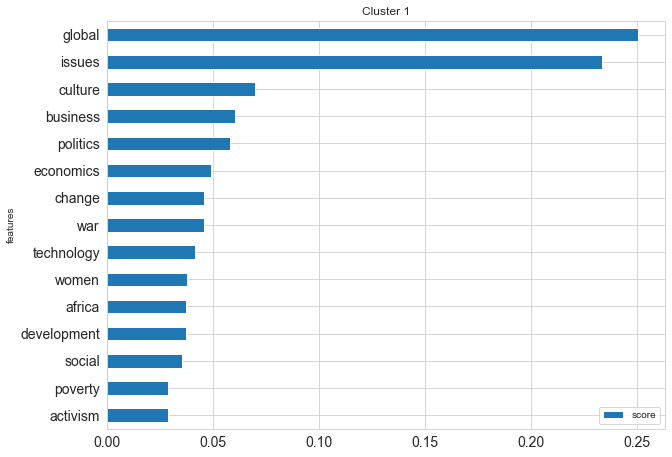

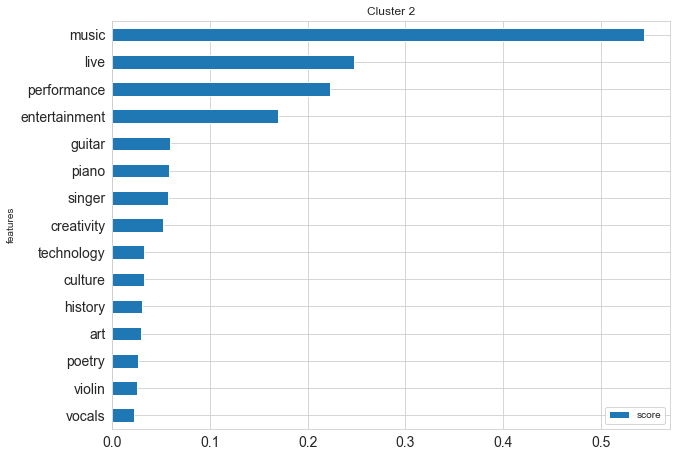

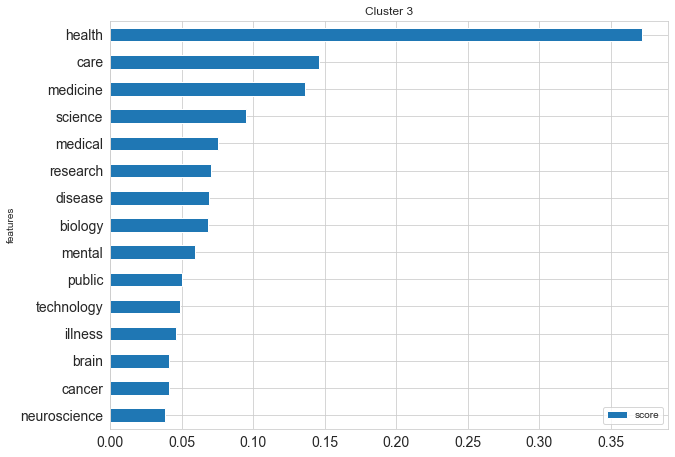

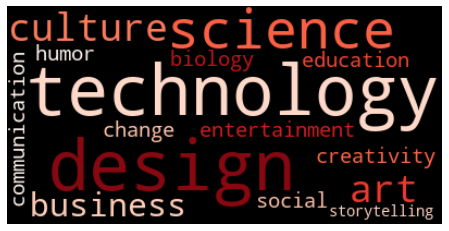

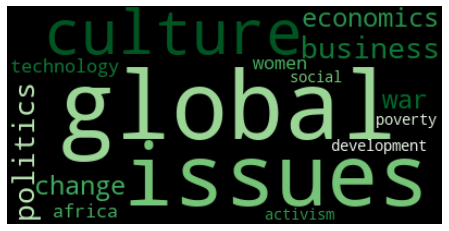

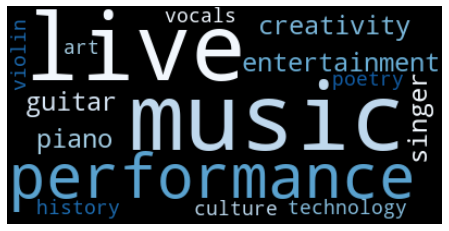

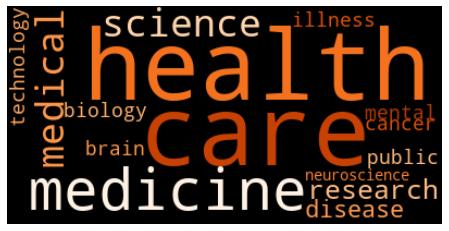

In [52]:
# Instantiate model
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=50,
    max_iter=300,
    random_state=42
)

# Fit to data and predict cluster assignments
kmeans.fit(tf_idf_array)
predictions = kmeans.predict(tf_idf_array)

# Identify and plot top features for each cluster
dfs = get_top_n_features_by_cluster(tf_idf_array, predictions, 15)

plot_barh_top_features(dfs)
plot_wordcloud(dfs,'black')

Adding one more cluster seems to have split the technology and science cluster into two:
- Medical sciences
- More general TED talk themes, like technology, education, communication, etc.

In [53]:
sil_score = silhouette_score(tf_idf_array, kmeans.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % sil_score)

Silhouette Score: 0.032


The score is still very close to zero, but adding a 4th cluster has improved it a little bit.

What about increasing the number of clusters to 12?

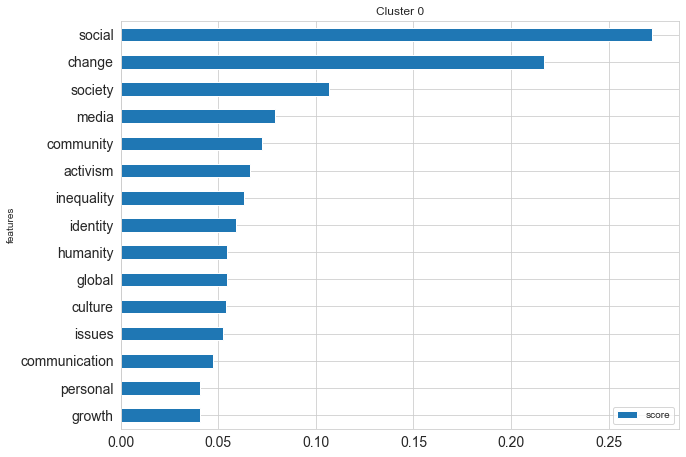

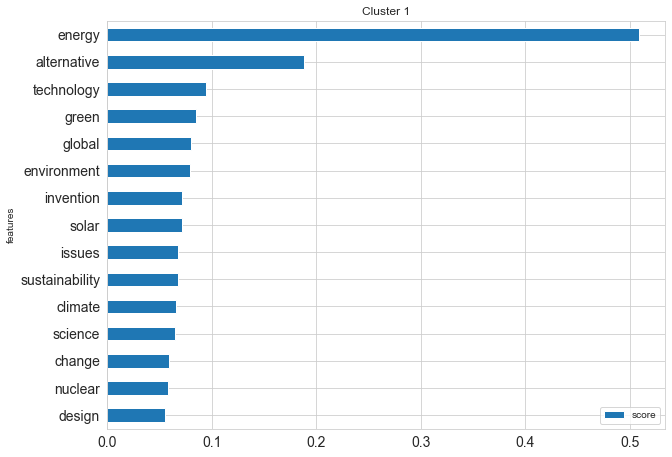

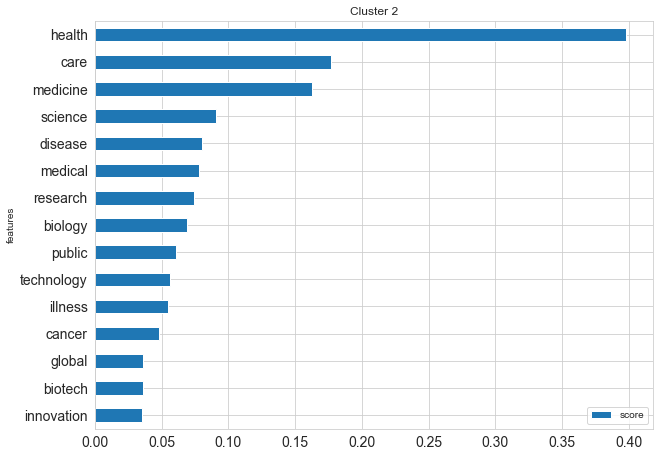

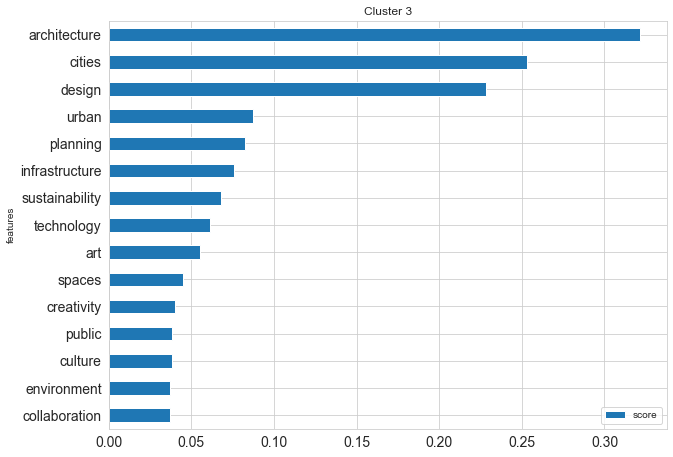

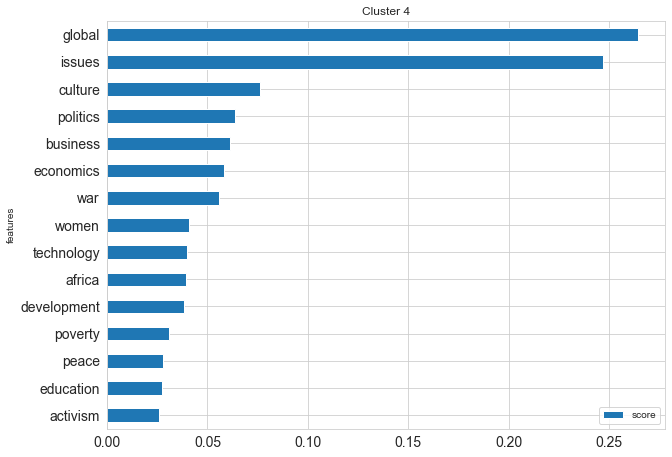

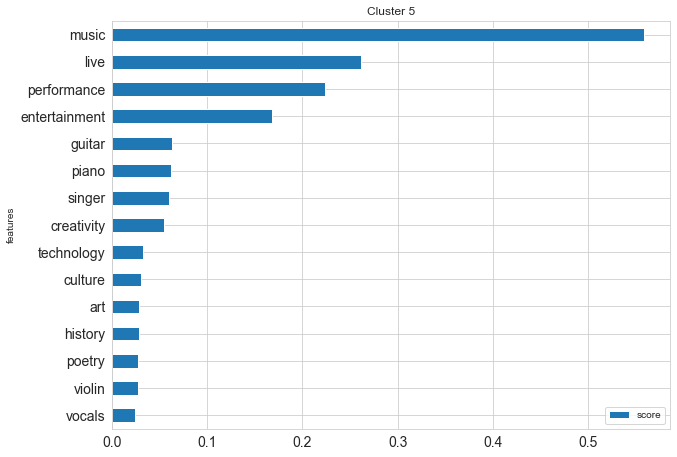

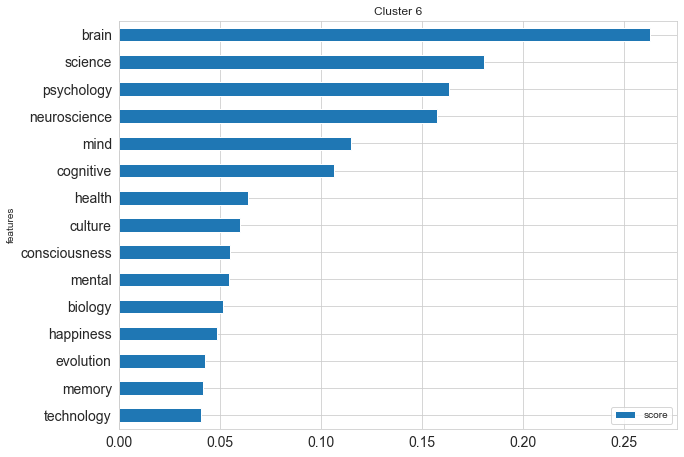

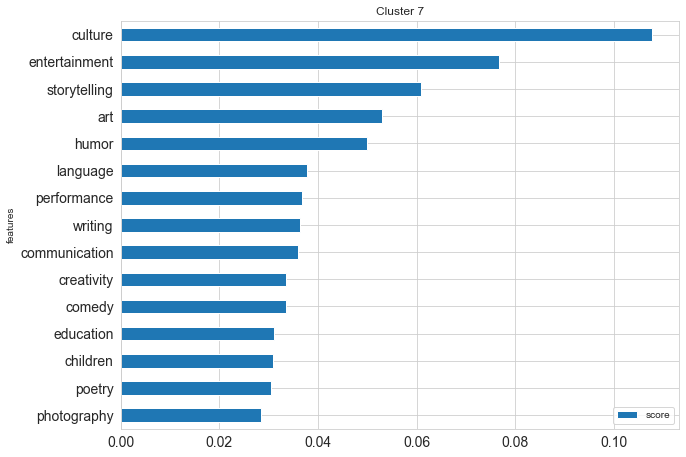

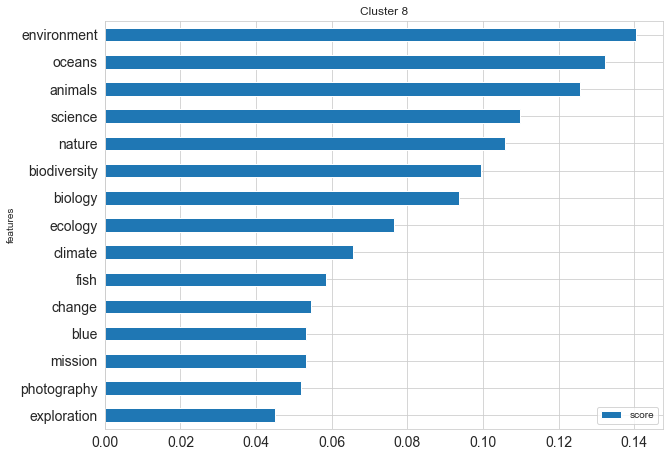

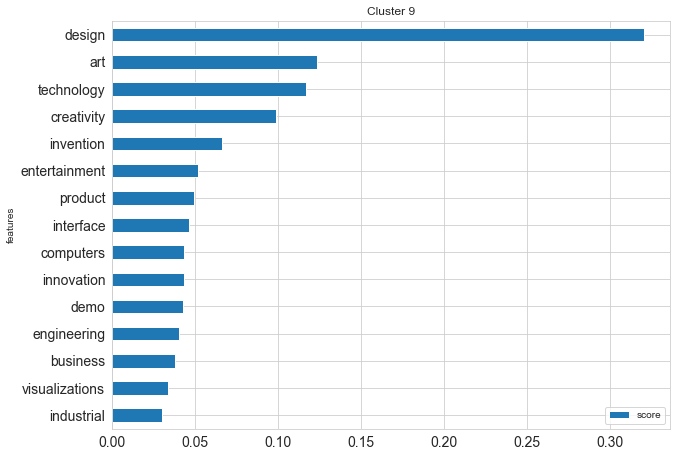

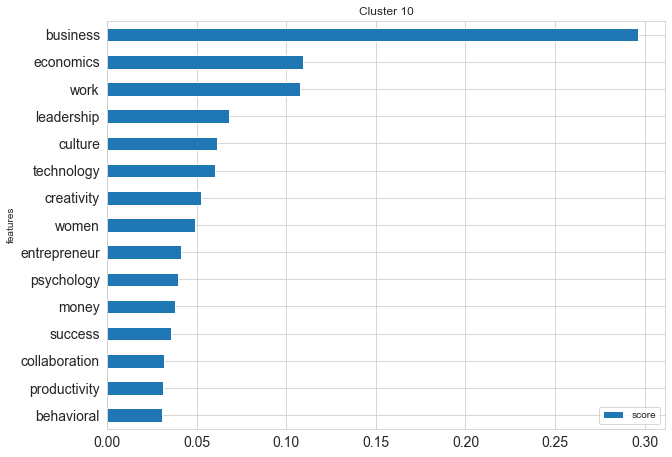

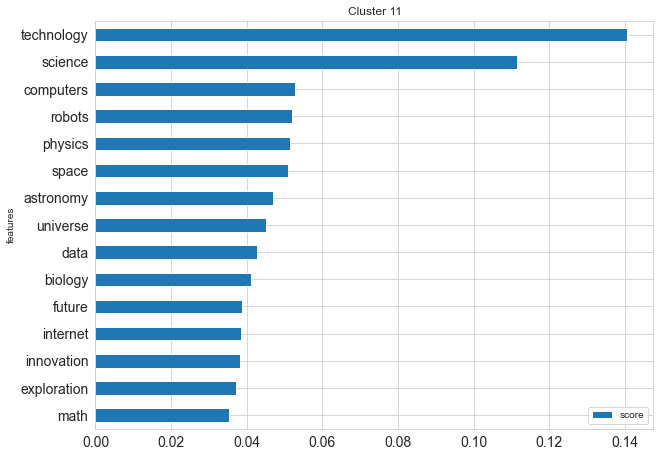

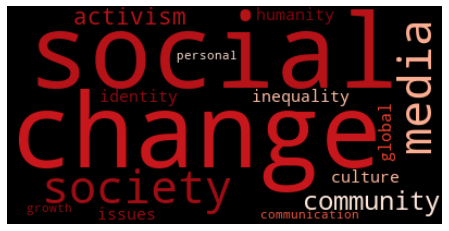

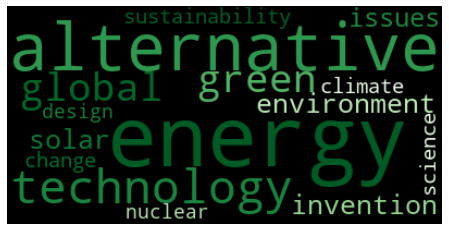

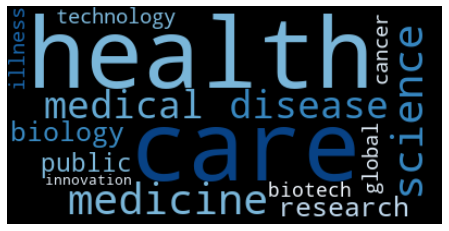

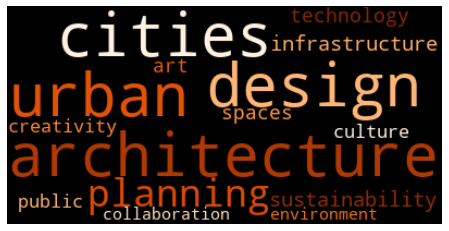

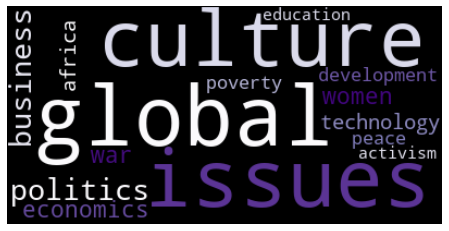

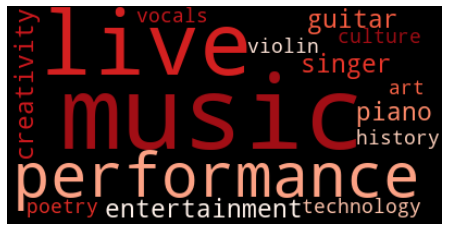

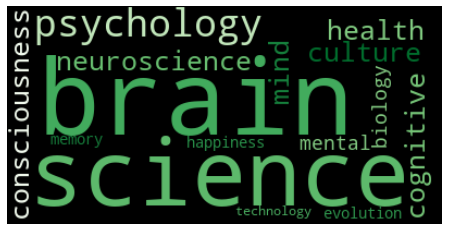

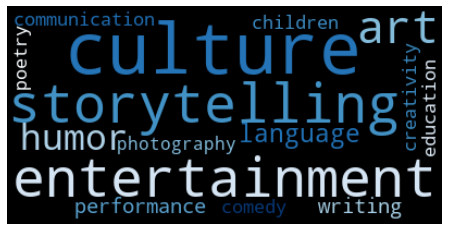

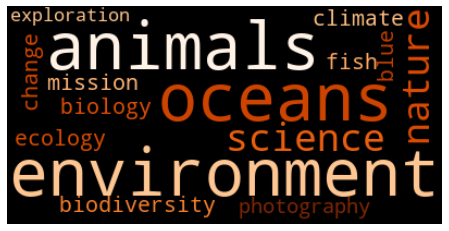

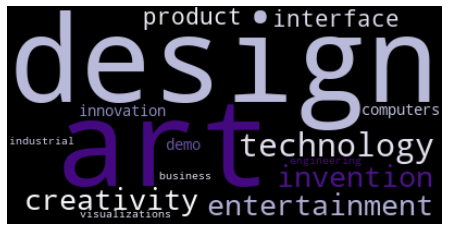

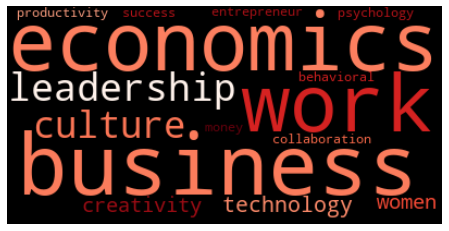

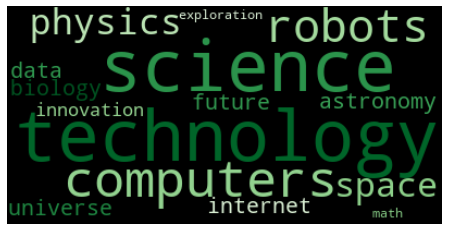

In [54]:
# Instantiate model
kmeans = KMeans(
    init="random",
    n_clusters=12,
    n_init=50,
    max_iter=300,
    random_state=42
)

# Fit to data and predict cluster assignments
kmeans.fit(tf_idf_array)
predictions = kmeans.predict(tf_idf_array)

# Identify and plot top features for each cluster
dfs = get_top_n_features_by_cluster(tf_idf_array, predictions, 15)

plot_barh_top_features(dfs)
plot_wordcloud(dfs,'black')

Adding more clusters has further specialized the topics in each cluster.

- General TED topics:
    - animals and nature
    - urban design
    - business and economics


- Global and Cultural Socioeconomic issues:
    - social activism
    - green energy and sustainability
    - global issues


- Arts and Entertainment:
    - music
    - language arts
    - art and design


- Science and Technology:
    - physical sciences and computers
    - health care/medicine
    - psychology and neuroscience

In [55]:
sil_score = silhouette_score(tf_idf_array, kmeans.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % sil_score)

Silhouette Score: 0.047


Increasing the number of clusters from 4 to 12 had another marginal improvement in silhouette score.

This seems logical - increasing the number of clusters should reduce the inter- and intra-cluster distance for each cluster. But there is still a lot of overlap, even with 12 clusters.

## Calculate ideal number of clusters

#### Attempt to locate the "elbow"

Build multiple KMeans models, increasing the number of clusters from 1 to 20.

Plot the scores for each model to identify the "elbow".

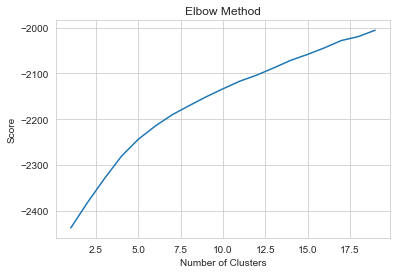

In [56]:
number_clusters = range(1, 20)

kmeans = [KMeans(n_clusters=i, n_init = 50, max_iter = 600, random_state = 42) for i in number_clusters]
kmeans

score = [kmeans[i].fit(tf_idf_array).score(tf_idf_array) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

No "elbow" is clearly identifiable from simple visual inspection.

It looks like it could be somewhere between 4 and 7, or possibly as far out as 17.

Let's try again using the kneed library's KneeLocator to calculate the "elbow" point.

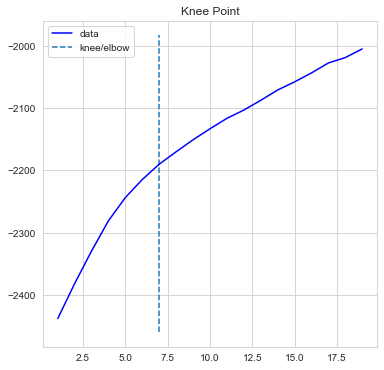

In [57]:
knee_loc = KneeLocator(number_clusters, score, S=1.0, curve='concave', direction='increasing')
knee_loc.plot_knee()

Based on this, the "elbow" appears to be at 7 clusters.

#### Re-run the model with 7 clusters.

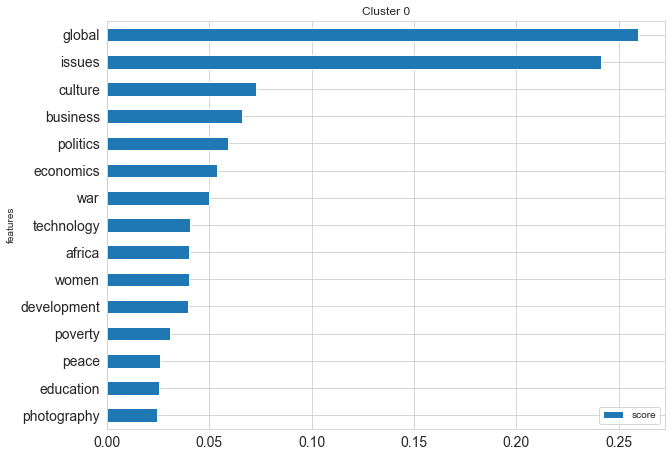

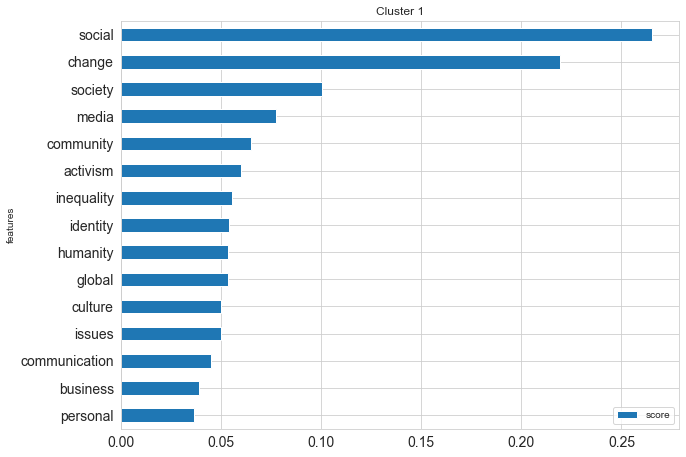

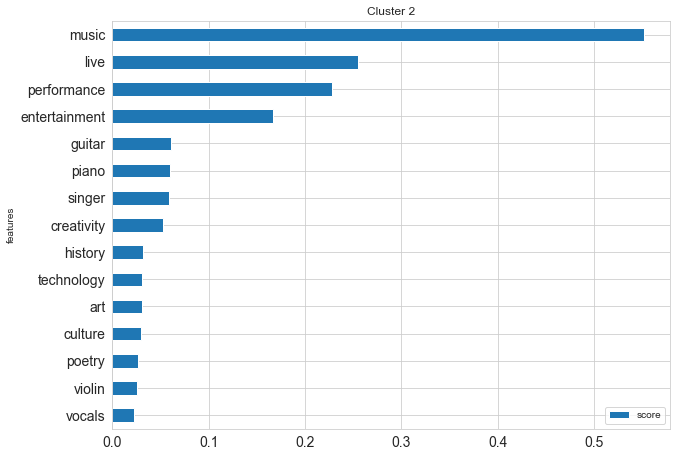

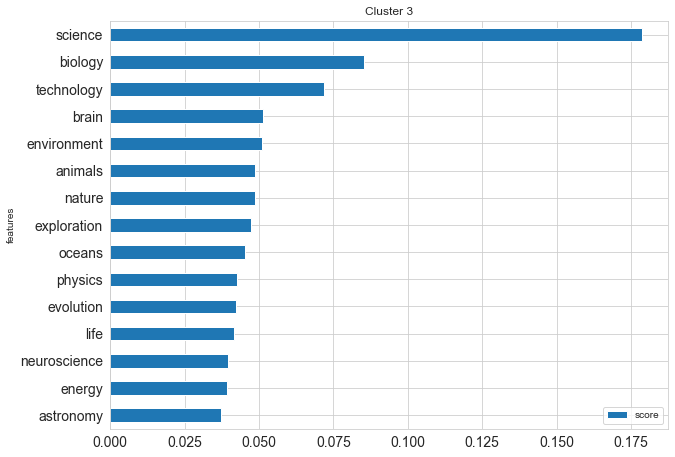

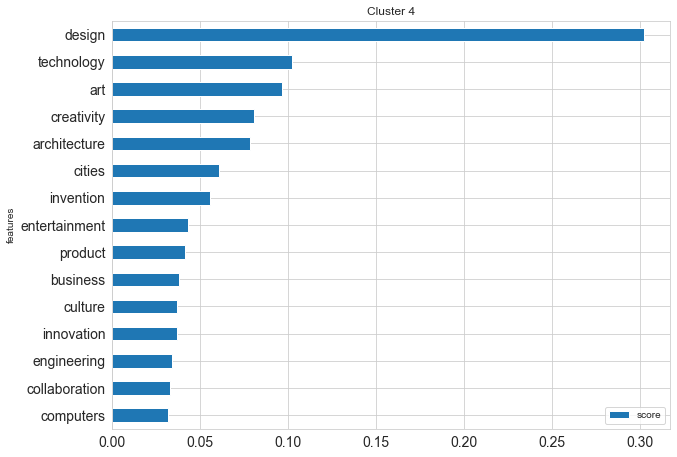

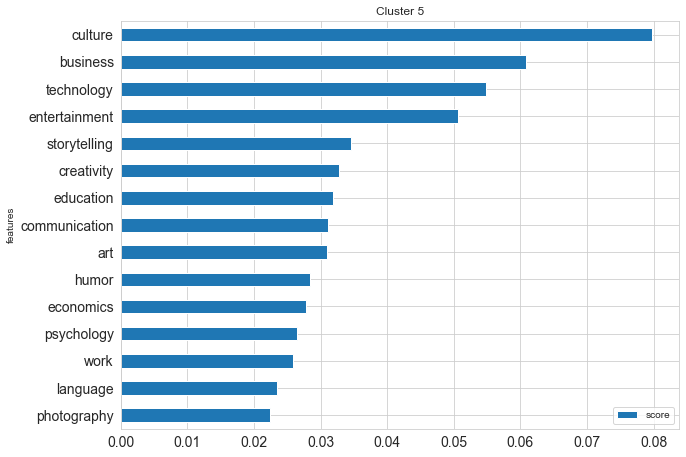

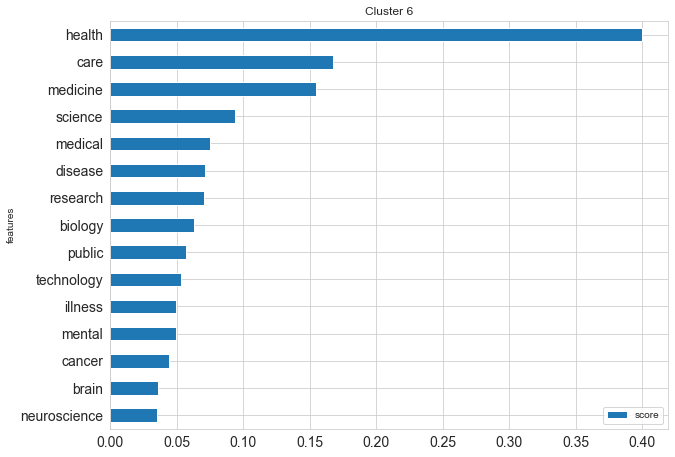

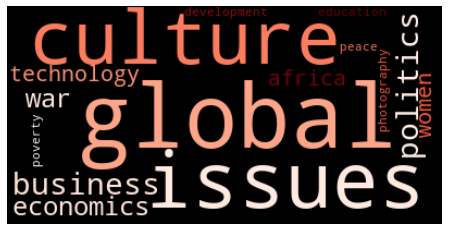

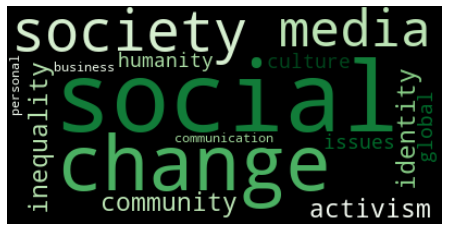

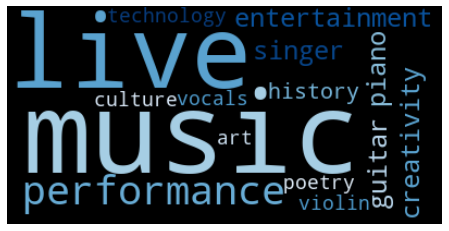

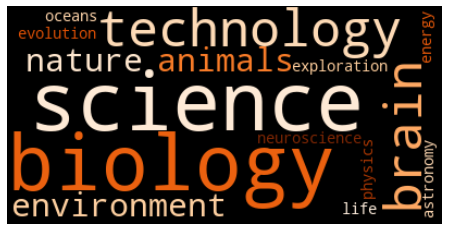

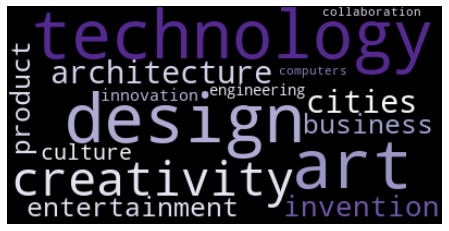

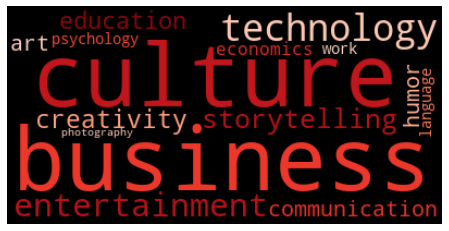

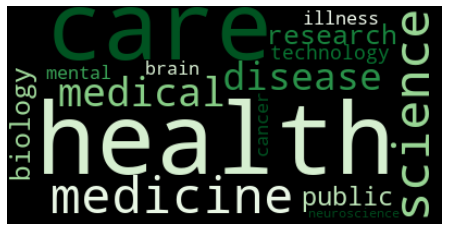

In [58]:
# Instantiate model
kmeans = KMeans(
    init="random",
    n_clusters=7,
    n_init=50,
    max_iter=600,
    random_state=42
)

# Fit to data and predict cluster assignments
kmeans.fit(tf_idf_array)
predictions = kmeans.predict(tf_idf_array)

# Identify and plot top features for each cluster
dfs = get_top_n_features_by_cluster(tf_idf_array, predictions, 15)

plot_barh_top_features(dfs)
plot_wordcloud(dfs,'black')

Based on the "elbow" method, the optimal set of clusters is:
- global/cultural socioeconomic issues
- social activism

- music and performance art

- invention and innovation (general TED topics)
- business and communication (general TED topics)

- health and medicine
- science and nature

## Score the model

Calculate the silhouette score

In [59]:
sil_score = silhouette_score(tf_idf_array, kmeans.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % sil_score)

Silhouette Score: 0.041


This score is only slightly lower than we had for 12 clusters. It seems to do almost as well at dividing up the talks, but uses 5 fewer clusters.